In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import glob

from sklearn.tree import DecisionTreeRegressor
from lazypredict.Supervised import LazyRegressor
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import RidgeCV
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import VotingRegressor, StackingRegressor, HistGradientBoostingRegressor, BaggingRegressor, AdaBoostRegressor, ExtraTreesRegressor, GradientBoostingRegressor

from sklearn.model_selection import train_test_split

In [53]:
# X.shape

(2615, 79)

In [28]:
# build per finferprint
padel_fingerprints_name = ['AtomPairs2DCount',
 'AtomPairs2D',
 'CDKextended',
 'CDK',
 'CDKgraphonly',
'Estate',
 'KlekotaRothCount',
 'KlekotaRoth',
 'MACCS',
 'PubChem',
 'SubstructureCount',
 'Substructure']

r1 = LinearRegression()
r2 = RandomForestRegressor(n_estimators=10, random_state=1)
r3 = KNeighborsRegressor()
estimators = [('lr', RidgeCV()), ('svr', LinearSVR(random_state= 42))]

models = [
    LinearSVR(),
    LinearRegression(),
    VotingRegressor([('lr', r1), ('rf', r2), ('r3', r3)]),
    StackingRegressor(estimators=estimators,final_estimator=RandomForestRegressor(n_estimators=10, random_state=42)),
    HistGradientBoostingRegressor(),
    BaggingRegressor(),
    AdaBoostRegressor(),
    ExtraTreesRegressor(),
    GradientBoostingRegressor(),
    DecisionTreeRegressor()
]
model_name = [
    "LinearSVR", "LinearRegression", "VotingRegressor", "StackingRegressor", 
    "HistGradientBoostingRegressor", "BaggingRegressor", "AdaBoostRegressor", 
    "ExtraTreesRegressor", "GradientBoostingRegressor", "DecisionTreeRegressor" 
]


y = pd.read_csv('serotonin_ki_minmax_scale.csv')
es_fingerprint = pd.read_csv('Estate.csv')
X = es_fingerprint.drop('Name', axis = 1)

# X remains unscaled
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state = 42)

r2_result = []
rmse_result =[]

#  'SubstructureCount',
#  'Substructure'
    
for i in range(0,10):
    model = models[i]
    name = model_name[i]
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    y_score = r2_score(y_test, y_predict)
    mse = mean_squared_error(y_test, y_predict)
    r2_result.append(y_score)
    rmse_result.append(math.sqrt(mse))
    
result = pd.DataFrame({"models":model_name, "r2_score": r2_result, "rmse":rmse_result})
result.to_csv('result3/model_result_Estate.csv', index=False)
result


models  r2_score  rmse
0                      LinearSVR     -0.01  0.05
1               LinearRegression     -0.03  0.05
2                VotingRegressor      0.59  0.03
3              StackingRegressor      0.31  0.04
4  HistGradientBoostingRegressor      0.57  0.03
5               BaggingRegressor      0.81  0.02
6              AdaBoostRegressor      0.84  0.02
7            ExtraTreesRegressor      0.71  0.03
8      GradientBoostingRegressor      0.37  0.04
9          DecisionTreeRegressor      0.64  0.03

In [7]:
import glob
import pandas as pd
result_file = glob.glob("result3/*.csv")
result_file.sort()
result_file

model_name = [
    "LinearSVR", "LinearRegression", "VotingRegressor", "StackingRegressor", 
    "HistGradientBoostingRegressor", "BaggingRegressor", "AdaBoostRegressor", 
    "ExtraTreesRegressor", "GradientBoostingRegressor", "DecisionTreeRegressor" 
]

r3 = pd.read_csv(result_file[3])
r4 = pd.read_csv(result_file[4])
r5 = pd.read_csv(result_file[5])
r6 = pd.read_csv(result_file[6])
r7 = pd.read_csv(result_file[7])
r8 = pd.read_csv(result_file[8])
r9 = pd.read_csv(result_file[9])
r10 = pd.read_csv(result_file[10])
r11 = pd.read_csv(result_file[11])
r12 = pd.read_csv(result_file[12])
r13 = pd.read_csv(result_file[13])
r14 = pd.read_csv(result_file[14])

In [9]:
combined_df = pd.DataFrame ({
    'models':model_name, 
    'AtomPairs2D': r3['r2_score'],
    'AtomPairs2DCount': r4['r2_score'],
    'EState': r5['r2_score'],
    'Fingerprinter': r6['r2_score'],
    'FingerprinterExtended': r7['r2_score'],
    'FingerprinterGraphOnly': r8['r2_score'],
    'KlekotaRoth': r9['r2_score'],
    'KlekotaRothCount': r10['r2_score'],
    'MACCS': r11['r2_score'],
    'PubChem': r12['r2_score'],
    'Substructure': r13['r2_score'],
    'SubstructureCount': r14['r2_score'],
})

combined_df.to_csv("result3/r2_score_second_combined_result.csv", index=False)
combined_df


models   AtomPairs2D  AtomPairs2DCount    EState  \
0                      LinearSVR  6.852359e-02      2.346918e-01 -0.006729   
1               LinearRegression -3.043731e+23     -1.807117e+18 -0.033453   
2                VotingRegressor -3.381924e+22     -2.007908e+17  0.594202   
3              StackingRegressor  7.018990e-01      3.416276e-01  0.311405   
4  HistGradientBoostingRegressor  6.926559e-01      6.794180e-01  0.573359   
5               BaggingRegressor  8.561648e-01      5.807205e-01  0.811443   
6              AdaBoostRegressor  7.678818e-01      5.378926e-01  0.841542   
7            ExtraTreesRegressor  8.420677e-01      5.484606e-01  0.707975   
8      GradientBoostingRegressor  8.471881e-01      8.022508e-01  0.368869   
9          DecisionTreeRegressor  8.459842e-01      4.733546e-01  0.644199   

   Fingerprinter  FingerprinterExtended  FingerprinterGraphOnly   KlekotaRoth  \
0       0.366877               0.316588            6.336913e-01  8.018020e-01   
1       0.263558               0.289839           -3.604935e+22 -1.208711e+20   
2       0.674050               0.720084           -4.005483e+21 -1.343012e+19   
3       0.172815               0.427210            4.927278e-01  5.671882e-01   
4       0.700571               0.726495            6.393196e-01  6.754128e-01   
5       0.672741               0.819423            7.433531e-01  7.773594e-01   
6       0.793910               0.807752            8.632873e-01  4.936642e-01   
7       0.615551               0.894517            8.816969e-01  9.258451e-01   
8       0.784766               0.811230            9.040332e-01  8.687059e-01   
9       0.192535               0.803890            8.814656e-01  9.321145e-01   

   KlekotaRothCount         MACCS       PubChem  Substructure  \
0      4.799245e-01  6.229891e-02  5.318283e-01  7.283372e-01   
1     -6.211479e+17 -6.228530e+19 -1.500727e+21 -5.822394e+20   
2     -6.901643e+16 -6.920589e+18 -1.667474e+20 -6.469327e+19   
3      6.969707e-01  3.022583e-01  3.425557e-01  6.614729e-01   
4      6.783525e-01  6.761288e-01  6.648721e-01  5.196160e-01   
5      3.300902e-01  7.896668e-01  6.974827e-01  7.758897e-01   
6      4.224356e-01  7.082171e-01  2.799599e-01  6.972683e-01   
7      9.095619e-01  8.328012e-01  5.641736e-01  7.858903e-01   
8      9.265530e-01  7.321942e-01  6.331872e-01  7.351114e-01   
9      9.233488e-01  6.079403e-01  9.029423e-01  7.858199e-01   

   SubstructureCount  
0       5.676387e-01  
1      -5.967596e+16  
2      -6.630663e+15  
3       5.350655e-01  
4       5.438811e-01  
5       7.696597e-01  
6       6.846403e-01  
7       8.271449e-01  
8       7.419743e-01  
9       8.307574e-01

In [10]:
combined_df3 = pd.DataFrame ({
    'models':model_name, 
    'AtomPairs2D': round(r3['rmse'], 3),
    'AtomPairs2DCount': round(r4['rmse'], 2),
    'EState': round(r5['rmse'], 2),
    'Fingerprinter': round(r6['rmse'], 2),
    'FingerprinterExtended': round(r7['rmse'], 2),
    'FingerprinterGraphOnly': round(r8['rmse'], 2),
    'KlekotaRoth': round(r9['rmse'], 2),
    'KlekotaRothCount': round(r10['rmse'], 2),
    'MACCS': round(r11['rmse'], 2),
    'PubChem': round(r12['rmse'], 2),
    'Substructure': round(r13['rmse'], 2),
    'SubstructureCount': round(r14['rmse'], 2),
})
# combined_df3.to_csv('result3/rmse_comined_result.csv', index=False)      
combined_df3

models   AtomPairs2D  AtomPairs2DCount  EState  \
0                      LinearSVR  5.100000e-02              0.05    0.05   
1               LinearRegression  2.896669e+10       70581167.12    0.05   
2                VotingRegressor  9.655563e+09       23527055.71    0.03   
3              StackingRegressor  2.900000e-02              0.04    0.04   
4  HistGradientBoostingRegressor  2.900000e-02              0.03    0.03   
5               BaggingRegressor  2.000000e-02              0.03    0.02   
6              AdaBoostRegressor  2.500000e-02              0.04    0.02   
7            ExtraTreesRegressor  2.100000e-02              0.04    0.03   
8      GradientBoostingRegressor  2.100000e-02              0.02    0.04   
9          DecisionTreeRegressor  2.100000e-02              0.04    0.03   

   Fingerprinter  FingerprinterExtended  FingerprinterGraphOnly   KlekotaRoth  \
0           0.04                   0.04            3.000000e-02  2.000000e-02   
1           0.05                   0.04            9.968835e+09  5.772407e+08   
2           0.03                   0.03            3.322945e+09  1.924136e+08   
3           0.05                   0.04            4.000000e-02  3.000000e-02   
4           0.03                   0.03            3.000000e-02  3.000000e-02   
5           0.03                   0.02            3.000000e-02  2.000000e-02   
6           0.02                   0.02            2.000000e-02  4.000000e-02   
7           0.03                   0.02            2.000000e-02  1.000000e-02   
8           0.02                   0.02            2.000000e-02  2.000000e-02   
9           0.05                   0.02            2.000000e-02  1.000000e-02   

   KlekotaRothCount         MACCS       PubChem  Substructure  \
0              0.04  5.000000e-02  4.000000e-02  3.000000e-02   
1       41380260.04  4.143702e+08  2.033979e+09  1.266912e+09   
2       13793420.01  1.381234e+08  6.779930e+08  4.223041e+08   
3              0.03  4.000000e-02  4.000000e-02  3.000000e-02   
4              0.03  3.000000e-02  3.000000e-02  4.000000e-02   
5              0.04  2.000000e-02  3.000000e-02  2.000000e-02   
6              0.04  3.000000e-02  4.000000e-02  3.000000e-02   
7              0.02  2.000000e-02  3.000000e-02  2.000000e-02   
8              0.01  3.000000e-02  3.000000e-02  3.000000e-02   
9              0.01  3.000000e-02  2.000000e-02  2.000000e-02   

   SubstructureCount  
0               0.03  
1        12826123.69  
2         4275374.56  
3               0.04  
4               0.04  
5               0.03  
6               0.03  
7               0.02  
8               0.03  
9               0.02

C:\Users\USER\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:235: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(


[[ 3.72677996e-01  3.72677996e-01 -1.64269802e+00 -6.68389421e-01
  -1.60394735e+00  3.72677996e-01  3.72677996e-01  3.72677996e-01
   3.72677996e-01  3.72677996e-01  3.72677996e-01  3.72677996e-01]
 [-2.98142397e+00 -2.98142397e+00 -1.73265398e+00 -1.10863845e+00
  -1.72826473e+00 -2.98142397e+00 -2.98142397e+00 -2.98142397e+00
  -2.98142397e+00 -2.98142397e+00 -2.98142397e+00 -2.98142397e+00]
 [ 7.70949435e-14 -1.01690827e-11  3.80105349e-01  6.40489390e-01
   2.71331996e-01 -5.92686525e-14  3.12114667e-13  1.29166865e-11
  -1.94053859e-12 -1.12212205e-12  8.02256980e-16  9.77971192e-15]
 [ 3.72677996e-01  3.72677996e-01 -5.71823532e-01 -1.49529828e+00
  -1.08982016e+00  3.72677996e-01  3.72677996e-01  3.72677996e-01
   3.72677996e-01  3.72677996e-01  3.72677996e-01  3.72677996e-01]
 [ 3.72677996e-01  3.72677996e-01  3.09944041e-01  7.53495925e-01
   3.01124644e-01  3.72677996e-01  3.72677996e-01  3.72677996e-01
   3.72677996e-01  3.72677996e-01  3.72677996e-01  3.72677996e-01]
 [ 3.

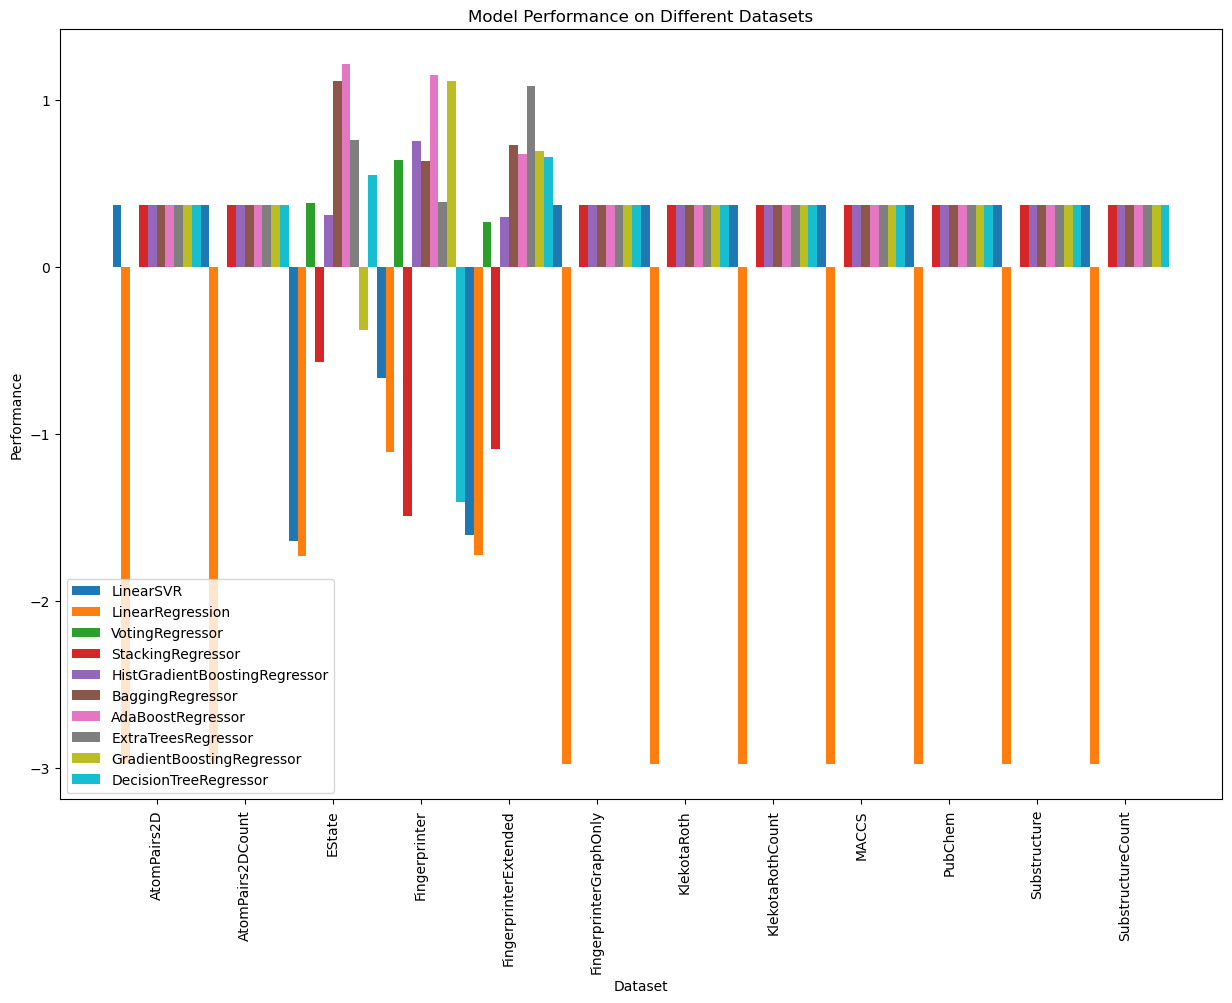

In [12]:
# visualize result
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler, StandardScaler

bar_width = 0.1
# get columns by index

# Plot each group of bars for each model
r2_dataframe = combined_df.drop('models', axis=1)
# print(r2_dataframe.values)
# print(r2_dataframe)
r2_values = np.array(r2_dataframe.values)

# scale data for better visualization
scaled_data_scale = scale(r2_values)
# print(scaled_data)
# scale using minmax scaler
scaler = StandardScaler()
scaled_data_minMax = scaler.fit_transform(r2_values)
print(scaled_data_minMax)

# get column header title
column_name = r2_dataframe.columns.tolist()
print(column_name)
x_pos = np.arange(len(column_name))
print(x_pos)

model_name = [
    "LinearSVR", "LinearRegression", "VotingRegressor", "StackingRegressor", 
    "HistGradientBoostingRegressor", "BaggingRegressor", "AdaBoostRegressor", 
    "ExtraTreesRegressor", "GradientBoostingRegressor", "DecisionTreeRegressor" 
]



# Create the figure and axes objects
fig, ax = plt.subplots(figsize=(15, 10))
# fig = plt.figure(figsize=(106, 16))
for i in range(len(model_name)):
    ax.bar(x_pos + (i * bar_width), scaled_data_minMax[i], bar_width, label=model_name[i])

# Add labels, title, and legend
ax.set_xlabel('Dataset')
ax.set_ylabel('Performance')
ax.set_title('Model Performance on Different Datasets')
# ax.set_xticks(x_pos + bar_width)
ax.set_xticks(np.arange(len(column_name)) + (len(model_name) - 1) * bar_width / 2)
ax.set_xticklabels(column_name,  rotation=90)
ax.legend()

# Show the plot
plt.show()


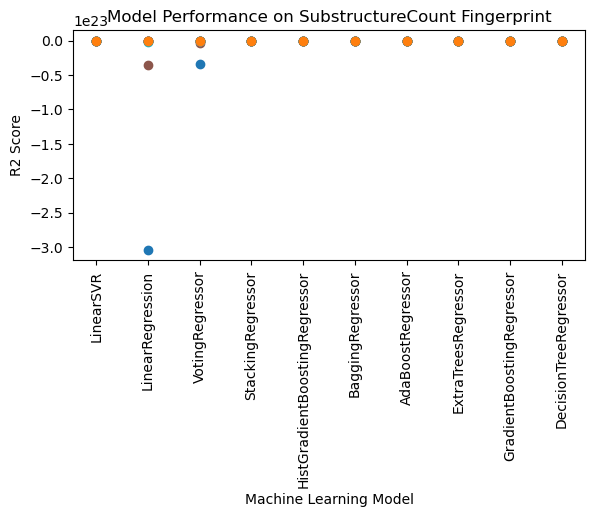

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Load data from a CSV file
data = pd.read_csv('result3/r2_score_combined_result.csv')

# drop model column to get column for fingerprints only
r2_dataframe = data.drop('models', axis=1)

# get column header title ( i.e fingerprint name)
column_name = r2_dataframe.columns.tolist()

# plt.figure(figsize=(10, 8))
# loop through each fingerprint and plot a scatter plot against model performace
for i in range(len(column_name)):
    
    # Extract columns
    models = data['models']
    r2_scores = data[column_name[i]]

    # Create scatter plot
    plt.scatter(models, r2_scores)

    # Add title and axis labels
    plt.title(f'Model Performance on {column_name[i]} Fingerprint')
    plt.xlabel('Machine Learning Model')
    plt.ylabel('R2 Score')

    # Rotate x-axis labels for better visibility
    plt.xticks(rotation=90)

    # Show plot
    # Adjust margins
    plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.42)
#     plt.savefig(f'result3/graph/r2score/scatter_plot_{column_name[i]}.png', dpi=300)


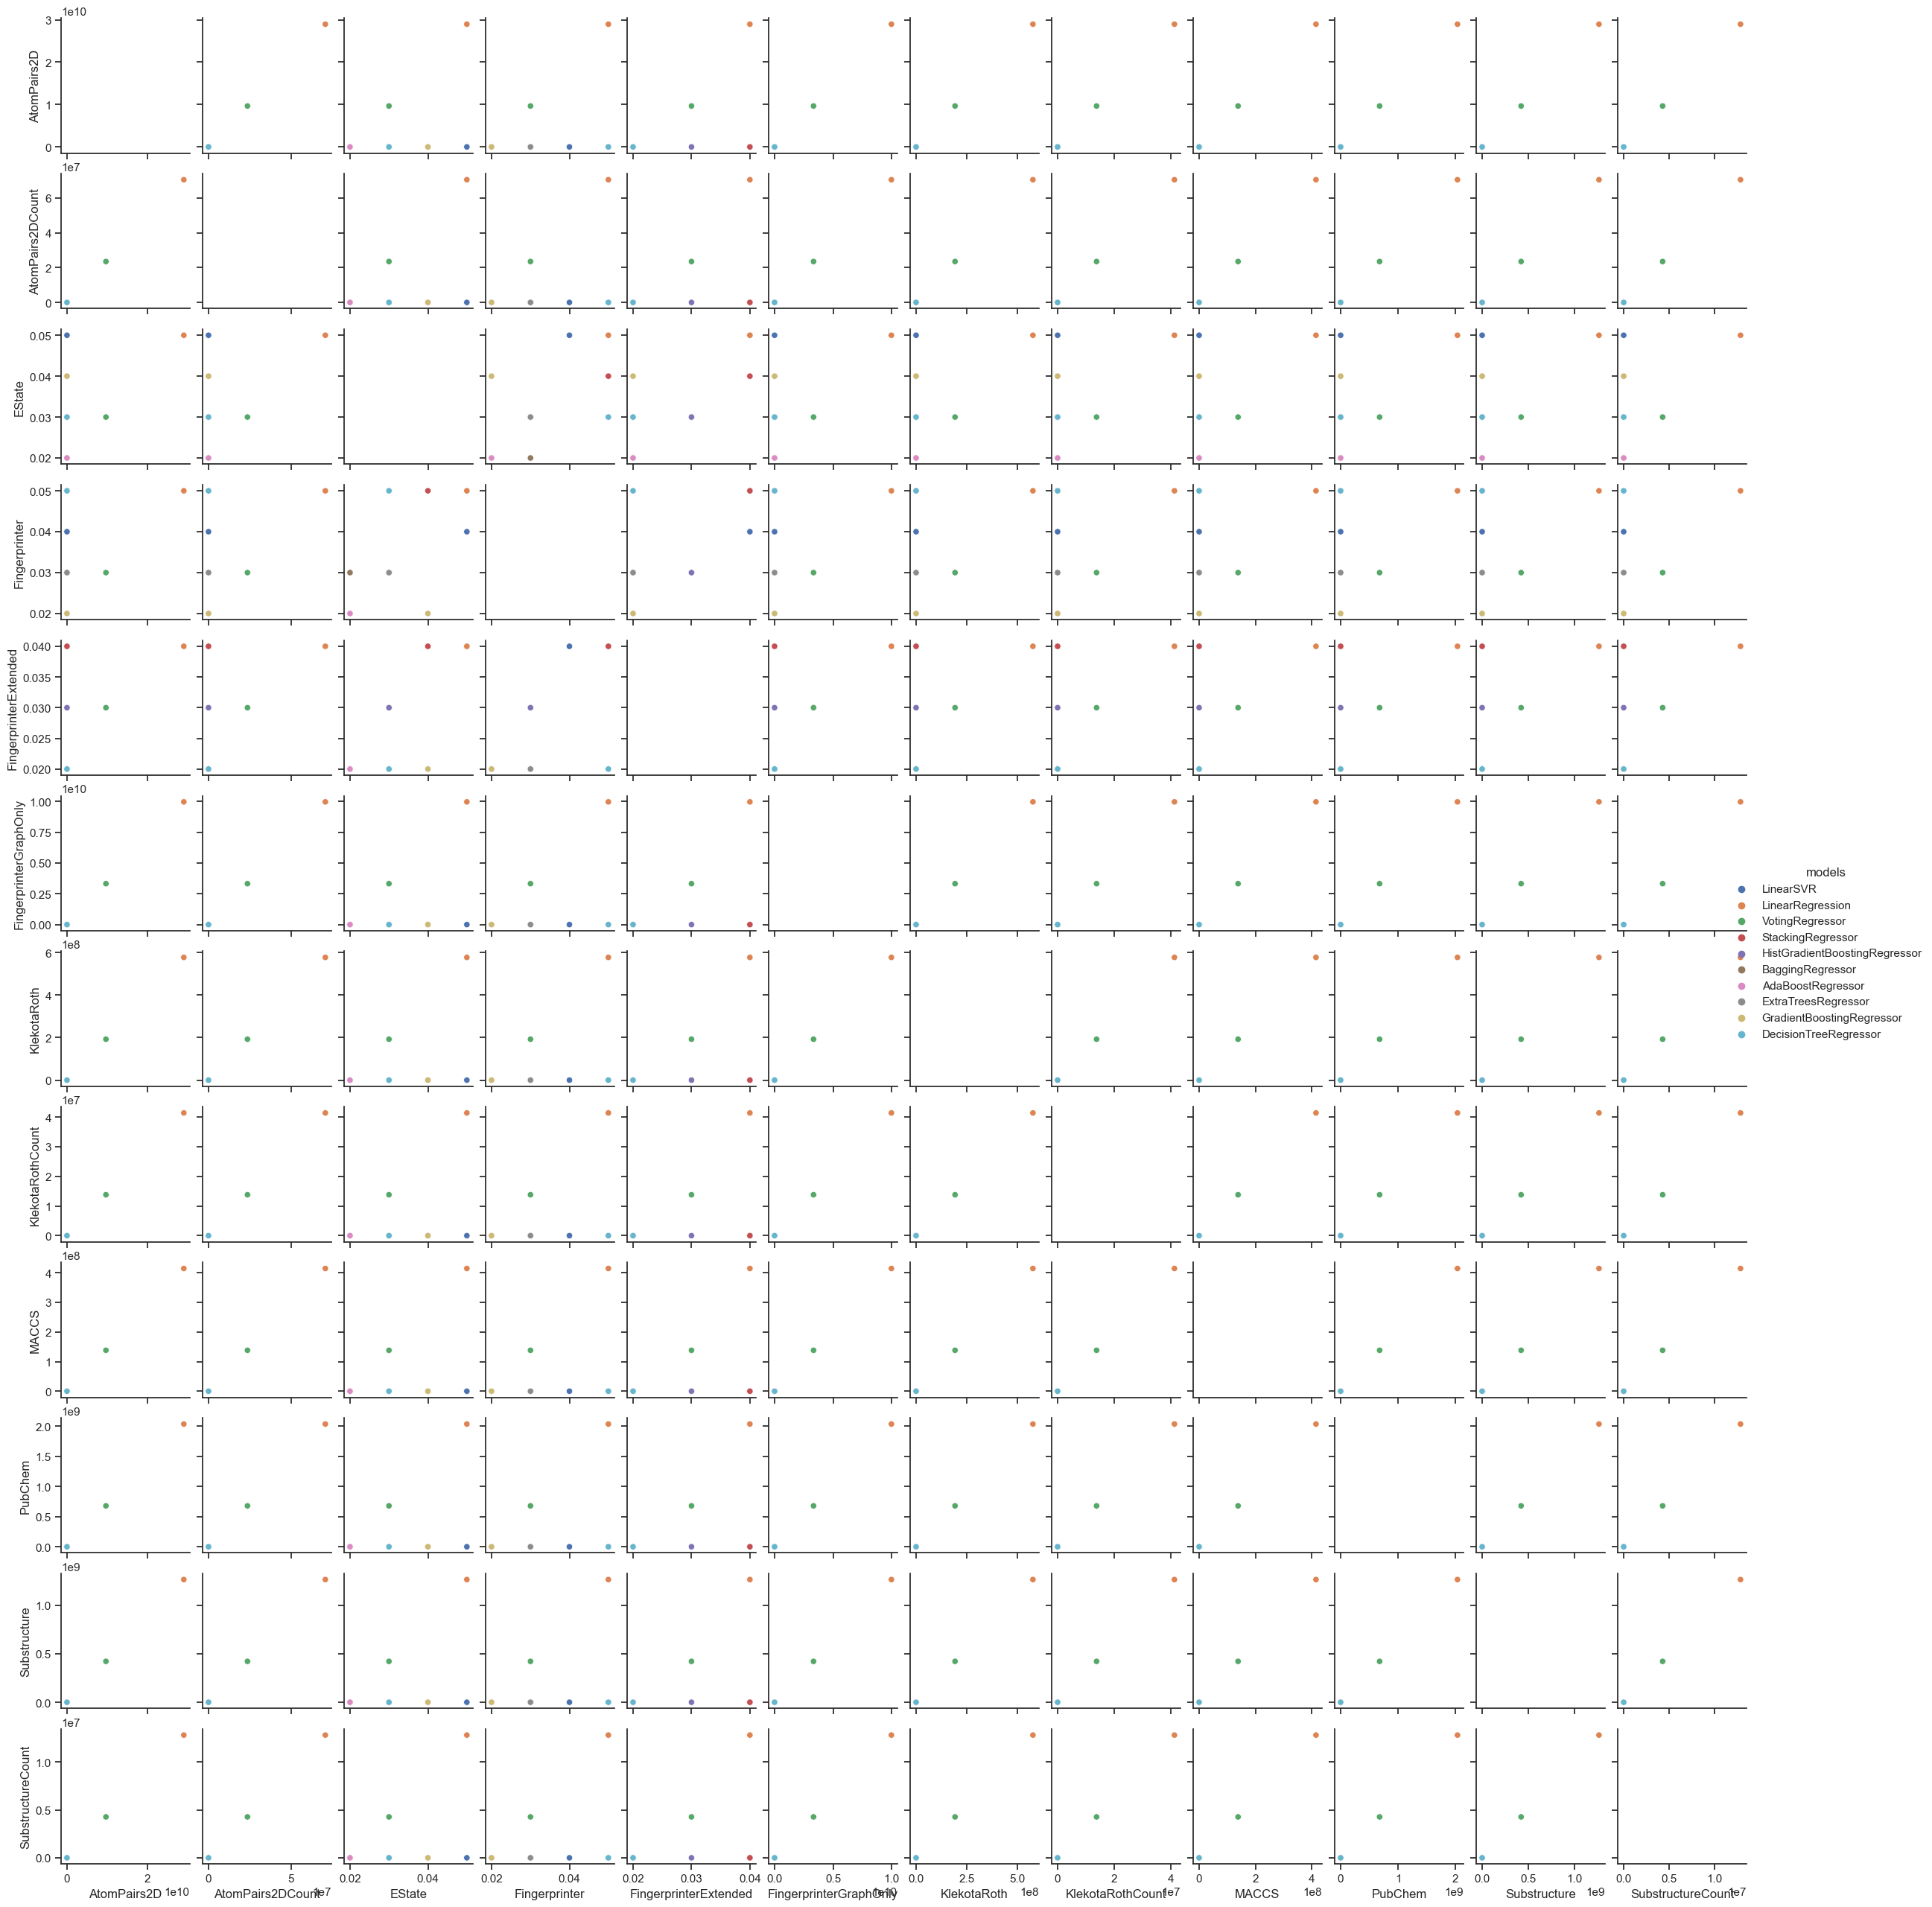

In [262]:
# r2_scatter_plot = sns.pairplot(combined_df3, hue='models')
# # Enlarge the plot
# r2_scatter_plot.fig.set_size_inches(2 * len(data.columns), 2 * len(data.columns))

# # Save the plot as an image
# r2_scatter_plot.savefig("result3/scatter_plot_matrix.png", dpi=300)

In [26]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import pandas as pd
# import seaborn as sns

# # Load data from a CSV file
# data = pd.read_csv('result3/rmse_comined_result.csv')

# # drop model column to get column for fingerprints only
# r2_dataframe = data.drop('models', axis=1)

# # get column header title ( i.e fingerprint name)
# column_name = r2_dataframe.columns.tolist()


# # loop through each fingerprint and plot a scatter plot against model performace
# for i in range(len(column_name)):
    
#     # Extract columns
#     models = data['models']
#     r2_scores = data[column_name[i]]

#     # Create scatter plot
#     plt.scatter(models, r2_scores)

#     # Add title and axis labels
#     plt.title(f'Model Performance on {column_name[i]} Fingerprint')
#     plt.xlabel('Machine Learning Model')
#     plt.ylabel('RMSE')

#     # Rotate x-axis labels for better visibility
#     plt.xticks(rotation=90)

#     # Show plot
# #     plt.show()
#     plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.42)
#     plt.savefig(f'result3/graph/rmse/rmse_scatter_plot_{column_name[i]}.png', dpi=300)


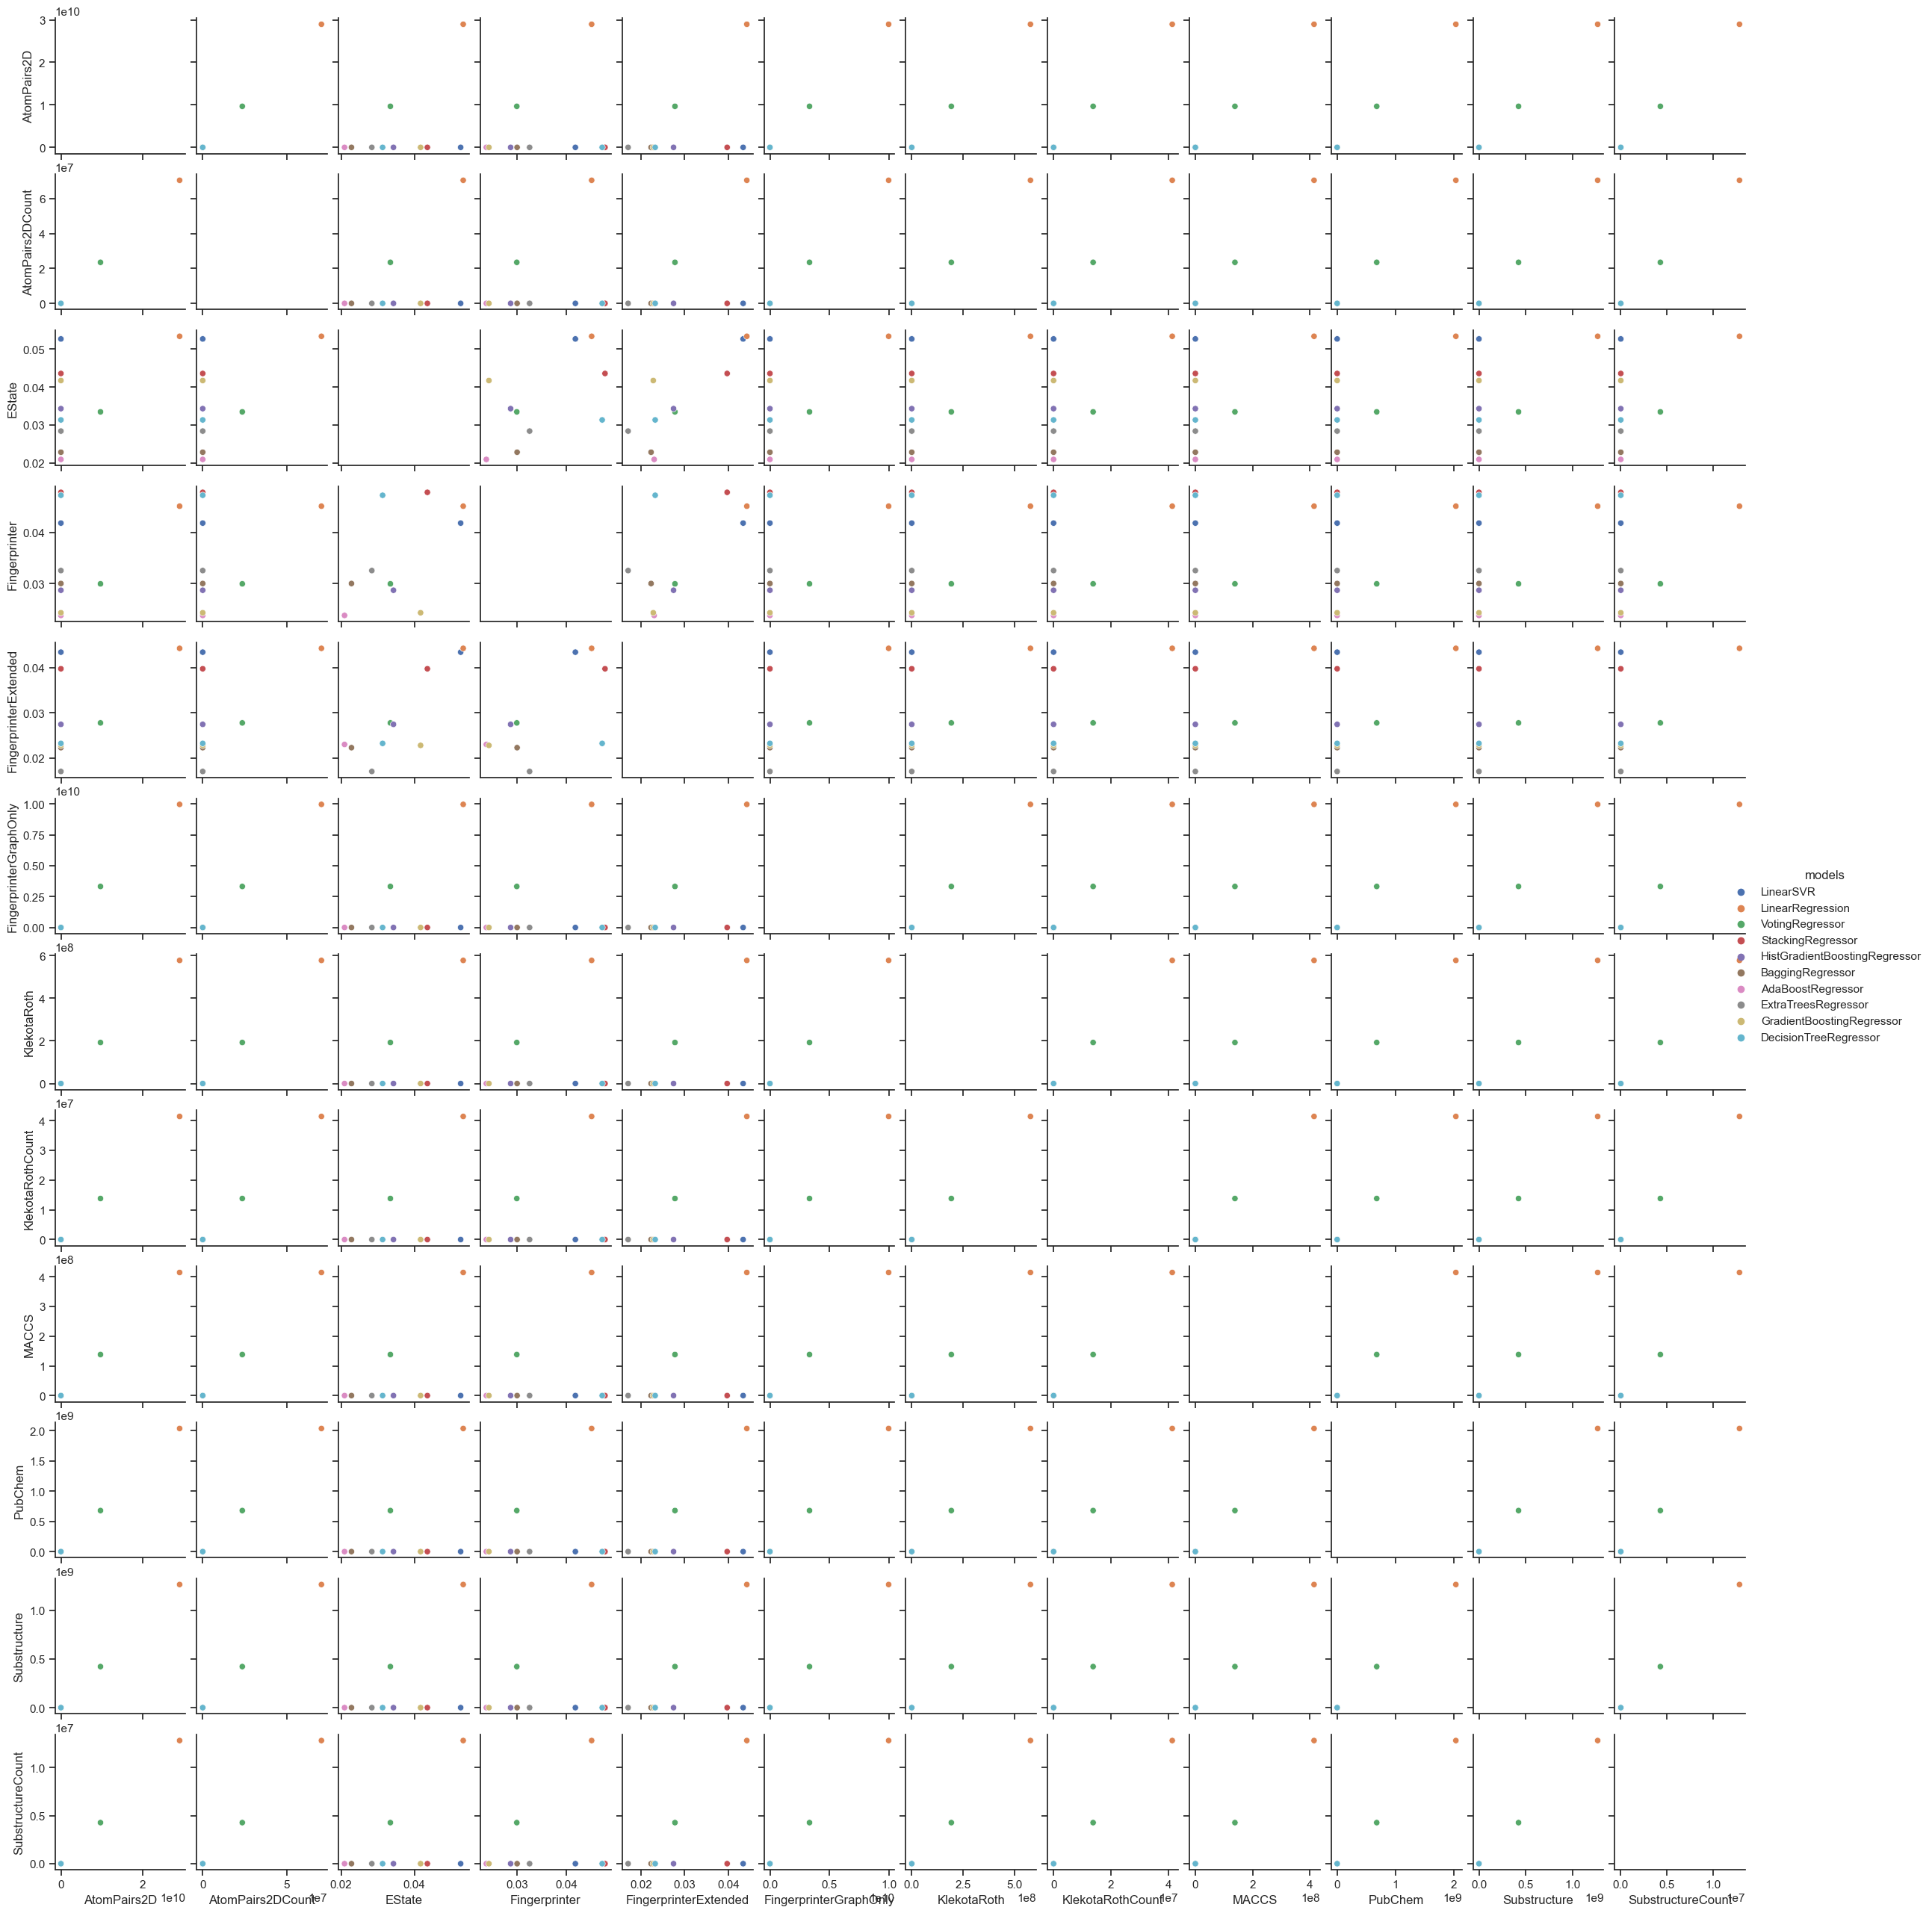

In [269]:
# import pandas as pd
# data = pd.read_csv('result3/rmse_comined_result.csv')
# rmse_scatter_plot = sns.pairplot(data, hue='models')
# # Enlarge the plot
# rmse_scatter_plot.fig.set_size_inches(2 * len(data.columns), 2 * len(data.columns))

# # Save the plot as an image
# rmse_scatter_plot.savefig("result3/graph/rmse/rmse_scatter_plot_matrix.png", dpi=300)

# Build model using extraTreeRegressor

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import r2_score
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import math


y = pd.read_csv('serotonin_ki_minmax_scale.csv')
kkrc_fp = pd.read_csv('KlekotaRoth.csv')

X = kkrc_fp.drop('Name', axis = 1)

# selector = VarianceThreshold()
# X = selector.fit_transform(X)
# X = pd.DataFrame(X)

X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=.2, random_state = 42)
model = ExtraTreesRegressor()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
r2score = r2_score(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)
rmse = math.sqrt(mse)

print(f"r2score => {r2score} \n rmse => {rmse}" )


C:\Users\adewa\AppData\Local\Temp\ipykernel_32896\1206624329.py:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


r2score => 0.9260386239888151 
 rmse => 0.01427901307093565


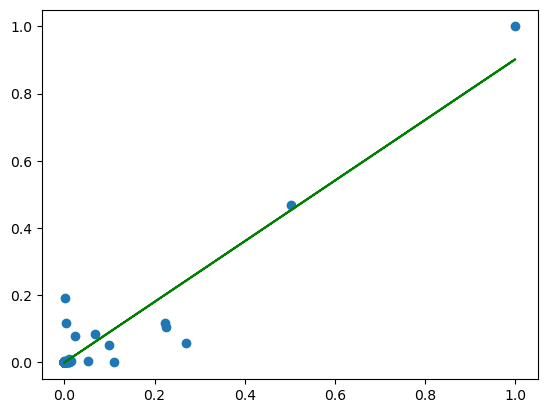

In [18]:
import matplotlib.pyplot as plt

# Create the scatter plot
# Fit a line to the data using numpy.polyfit
coeffs = np.polyfit(y_test.values.flatten(), y_predict, 1)
fit_func = np.poly1d(coeffs)

plt.scatter(y_test.values, y_predict)

# Add the fit line to the plot
plt.plot(y_test, fit_func(y_test), 'g')

# Save the plot to a file
plt.savefig('result3/graph/model_scatter_plot_kkr.png')

In [7]:
# serialize model
import pickle

pickle.dump(model, open('serotonin_model_confirm_kkr.pkl', 'wb'))

In [ ]:
import pandas as pd
from scipy.stats import shapiro

# Load the dataset into a pandas DataFrame
df = pd.read_csv('my_dataset.csv')

# Check if each column is Gaussian using the Shapiro-Wilk test
for col in df.columns:
    stat, p = shapiro(df[col])
    alpha = 0.05
    if p > alpha:
        print(f'{col} is likely Gaussian (p={p:.3f})')
    else:
        print(f'{col} is not likely Gaussian (p={p:.3f})')


### Principal component analysis on the Klekotharoth fingerprint

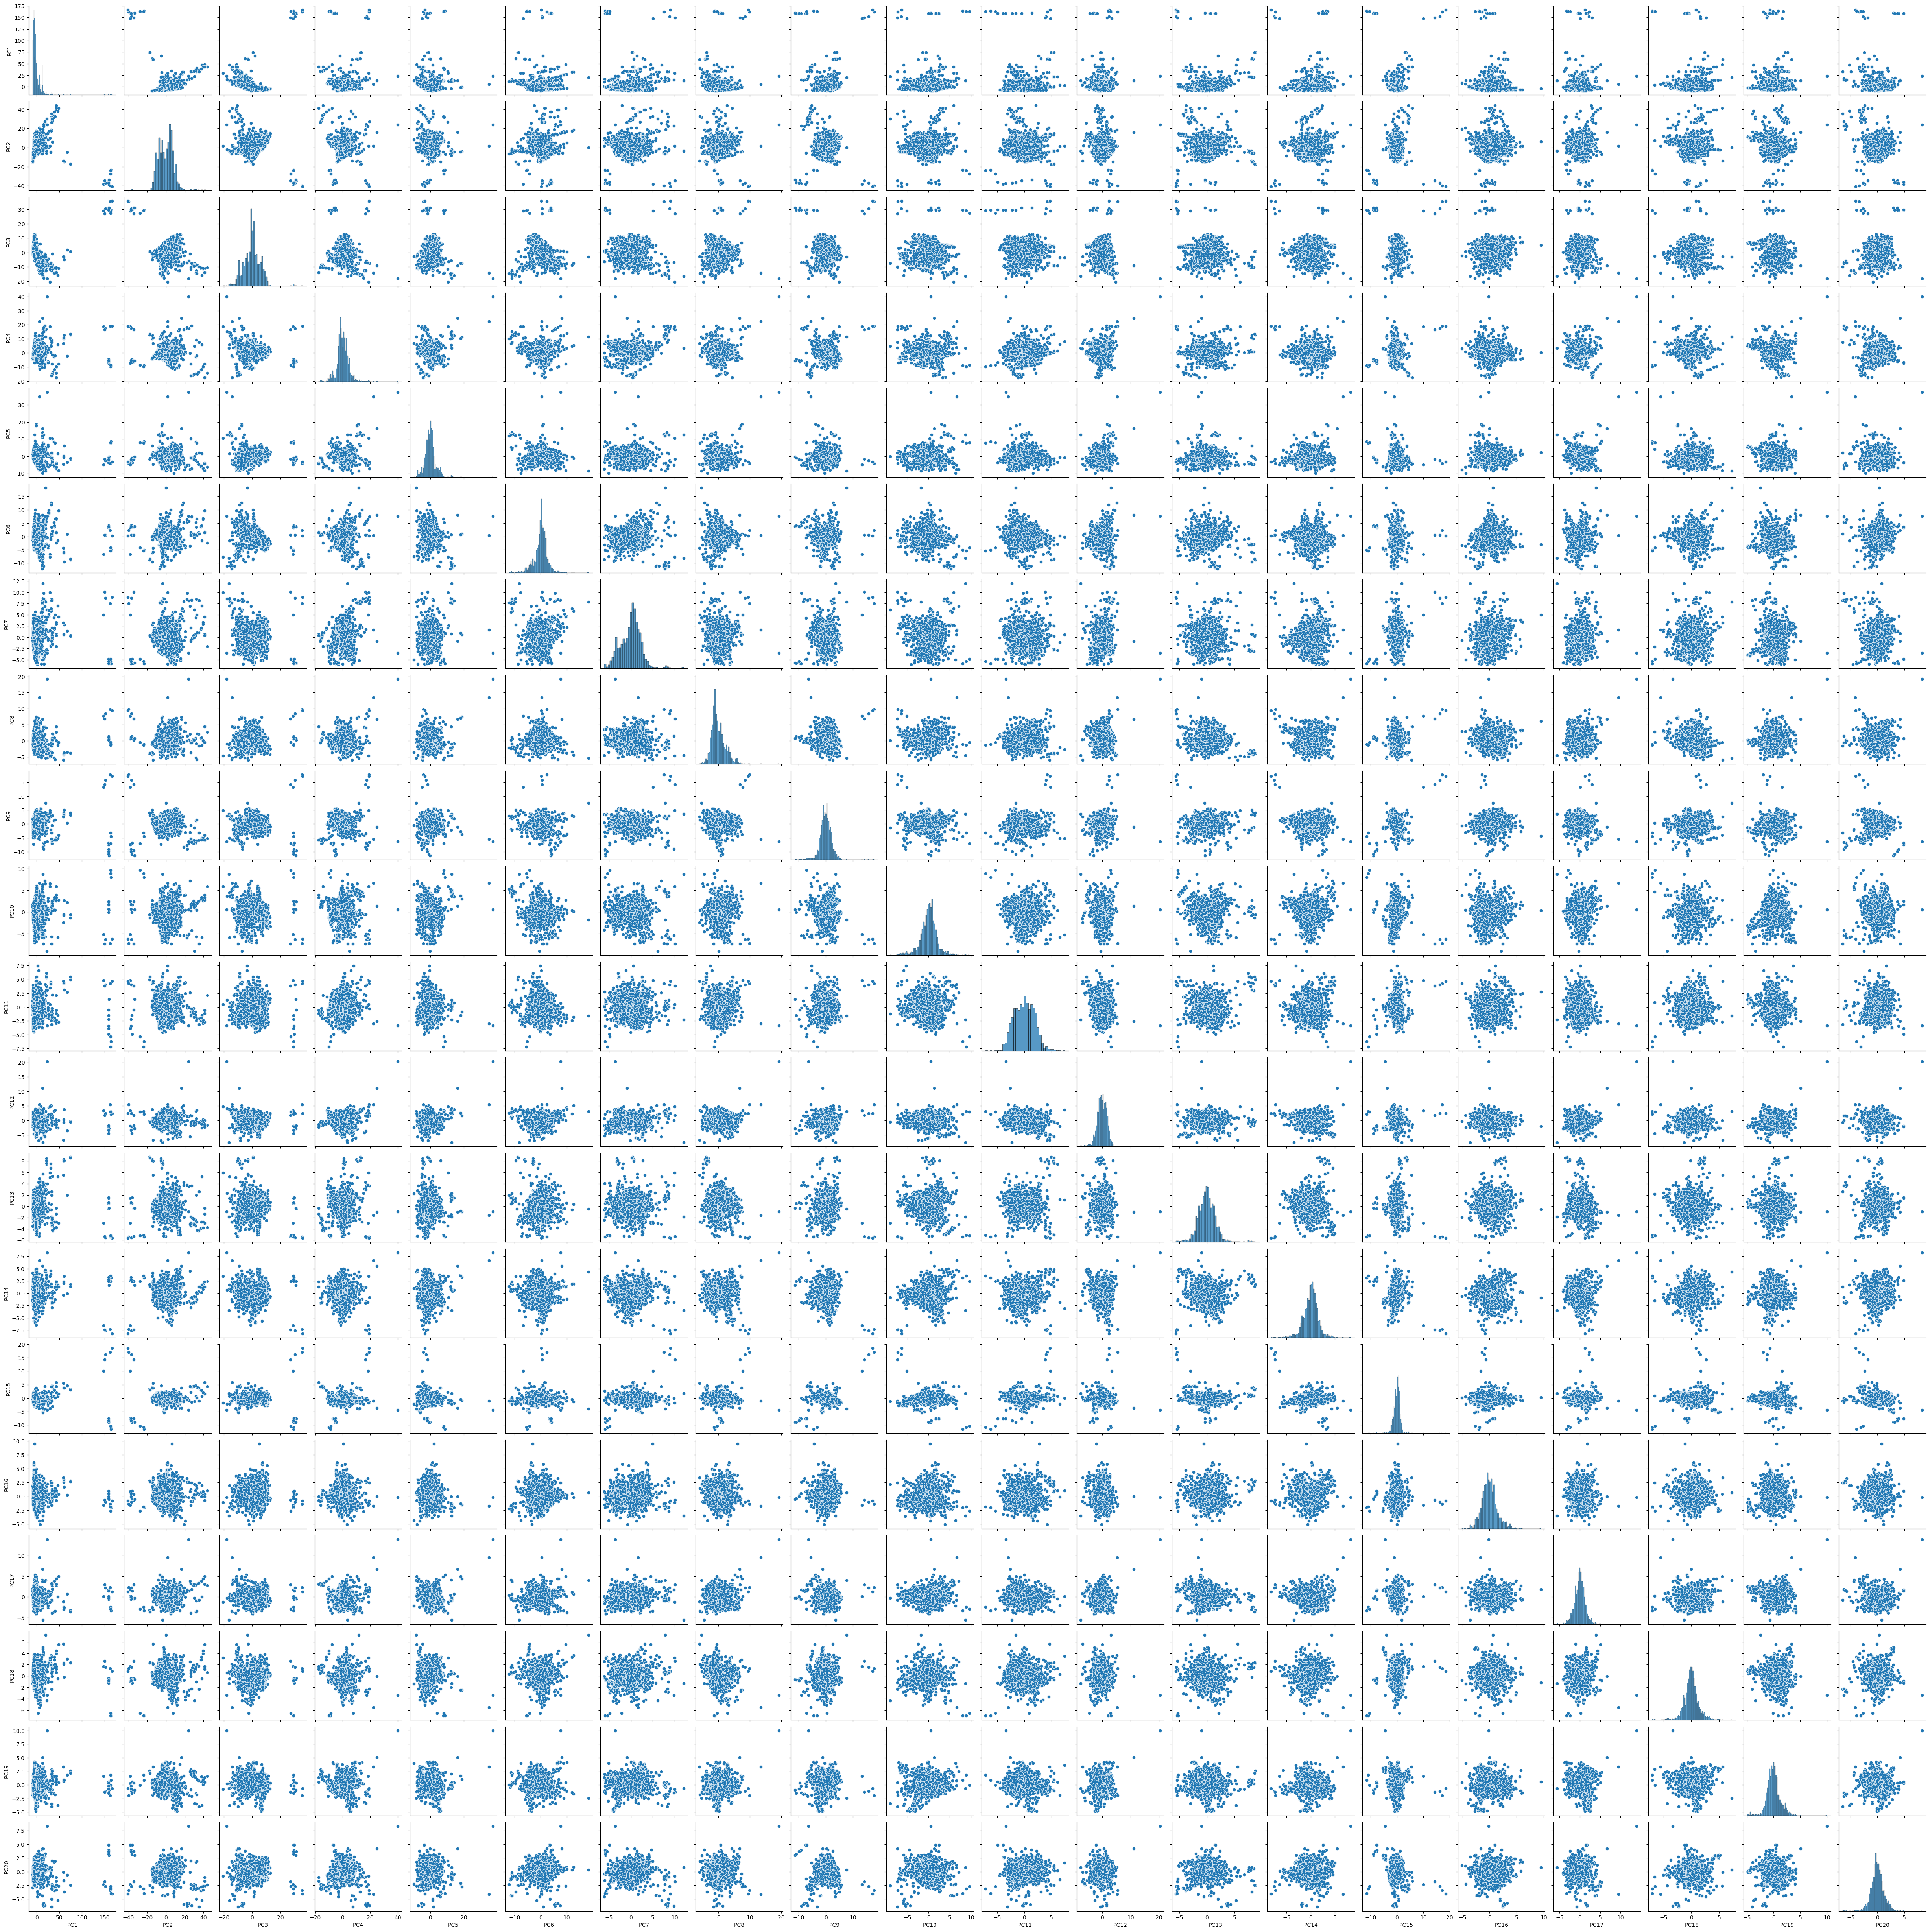

In [2]:
# import numpy as np
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Load your data into a pandas dataframe
# kkrc_fp = pd.read_csv('KlekotaRothCount.csv')
# df = kkrc_fp.drop('Name', axis = 1)

# # Standardize the data before performing PCA
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# df_standardized = scaler.fit_transform(df)

# # Perform PCA on the standardized data
# from sklearn.decomposition import PCA
# pca = PCA(n_components=20)
# principal_components = pca.fit_transform(df)
# # principal_components = pca.fit_transform(df_standardized)

# # Create a scatterplot matrix of selected principal components
# pcs_to_plot = pd.DataFrame(data = principal_components[:,0:20], columns = [f'PC{pc+1}' for pc in range(0,20)])
# sns.pairplot(pcs_to_plot)
# plt.show()
# plt.savefig('result3/graph/pca_pair_plot.png')
